In [20]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

In [21]:
file_path = '/content/credit_card_clustering (1).csv'
df = pd.read_csv(file_path)

# Display the first few rows of the DataFrame
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [4]:
df.isnull().sum()

,0
CUST_ID,0
BALANCE,0
BALANCE_FREQUENCY,0
PURCHASES,0
ONEOFF_PURCHASES,0
INSTALLMENTS_PURCHASES,0
CASH_ADVANCE,0
PURCHASES_FREQUENCY,0
ONEOFF_PURCHASES_FREQUENCY,0
PURCHASES_INSTALLMENTS_FREQUENCY,0


In [7]:
# Fill NaNs in 'Minimum Payments' with the mean of the column
df['MINIMUM_PAYMENTS'].fillna(df['MINIMUM_PAYMENTS'].mean(), inplace=True)
df['CREDIT_LIMIT'].fillna(df['CREDIT_LIMIT'].median(), inplace=True)

<ipython-input-7-3c1db83c4004>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['MINIMUM_PAYMENTS'].fillna(df['MINIMUM_PAYMENTS'].mean(), inplace=True)
<ipython-input-7-3c1db83c4004>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, 

In [8]:
df.isnull().sum()

,0
CUST_ID,0
BALANCE,0
BALANCE_FREQUENCY,0
PURCHASES,0
ONEOFF_PURCHASES,0
INSTALLMENTS_PURCHASES,0
CASH_ADVANCE,0
PURCHASES_FREQUENCY,0
ONEOFF_PURCHASES_FREQUENCY,0
PURCHASES_INSTALLMENTS_FREQUENCY,0


In [12]:
df = df.drop(columns=['CUST_ID'])

In [33]:
df.shape

(8950, 19)

In [13]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

In [15]:
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    sse.append(kmeans.inertia_)

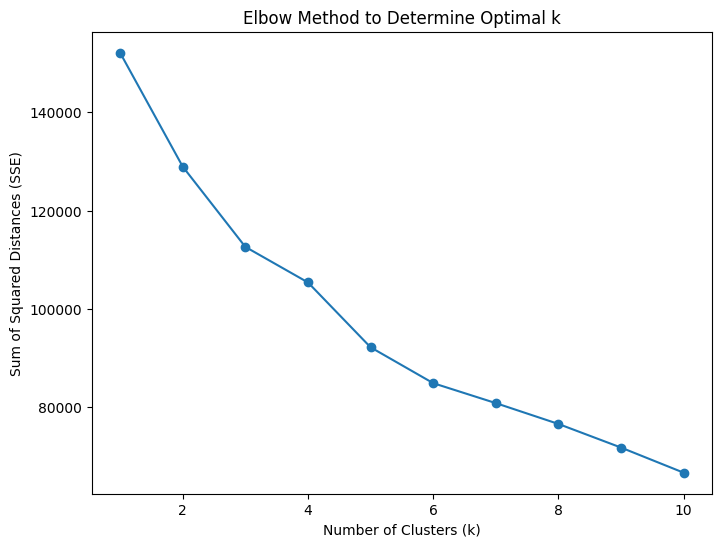

In [17]:
# Plotting the Elbow Curve
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), sse, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Distances (SSE)')
plt.title('Elbow Method to Determine Optimal k')
plt.show()

In [18]:
optimal_k = 4

In [19]:
# Step 4: Apply K-Means with the chosen number of clusters
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_data)

In [26]:
df['Cluster'] = kmeans.fit_predict(scaled_data)
print(df.head())

  CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  C10001    40.900749           0.818182      95.40              0.00   
1  C10002  3202.467416           0.909091       0.00              0.00   
2  C10003  2495.148862           1.000000     773.17            773.17   
3  C10004  1666.670542           0.636364    1499.00           1499.00   
4  C10005   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000       

In [27]:
# Step 5: Calculating the Silhouette Score to evaluate clustering quality
sil_score = silhouette_score(scaled_data, df['Cluster'])
print(f'Silhouette Score for k={optimal_k}: {sil_score:.4f}')

Silhouette Score for k=4: 0.1663


In [28]:
# Step 6: Analyze the Cluster Centers
print("Cluster Centers (in scaled space):")
print(kmeans.cluster_centers_)

Cluster Centers (in scaled space):
[[ 1.6583588   0.37994263 -0.13373098 -0.08511769 -0.15994498  1.94897985
  -0.40495779 -0.13910149 -0.36563848  1.86815435  1.83694328 -0.17471063
   1.02225432  0.84395262  0.58258305 -0.38912549 -0.07463635]
 [-0.69954546 -1.96366737 -0.30561772 -0.24214812 -0.27742331 -0.32397408
  -0.42297427 -0.43476219 -0.3259099  -0.50008413 -0.36905031 -0.39818775
  -0.23696135 -0.24052309 -0.26254928  0.34186545 -0.22374648]
 [-0.14925269  0.41152809  0.55174764  0.3912116   0.58548808 -0.35493086
   1.09147739  0.62938906  0.96538583 -0.46687734 -0.35773196  0.72486998
   0.17252015  0.14350726 -0.03431058  0.44192558  0.15841156]
 [-0.03302844  0.37578182 -0.33694597 -0.23048479 -0.37301988 -0.0925316
  -0.70606229 -0.35024325 -0.6436046   0.11213595 -0.03763609 -0.44442034
  -0.35081729 -0.2708165  -0.02095766 -0.44714556 -0.02624505]]


In [29]:
# Step 7: Count the number of samples in each cluster
print("\nNumber of samples in each cluster:")
print(df['Cluster'].value_counts())


Number of samples in each cluster:
Cluster
3    3368
2    3118
1    1487
0     977
Name: count, dtype: int64


In [30]:
df.head(5)
# Now we can see a new column cluster is being added in our dataset , here
# and in that cluster it is mentioned that the datapoint belongs to which cluster like 1st customer with df(CUST_ID[C10001]) is having
# df(Cluster[3]) this shows that our 1st customer belongs to 3rd cluster.

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Cluster
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,3
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,0
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,2
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12,3
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,3


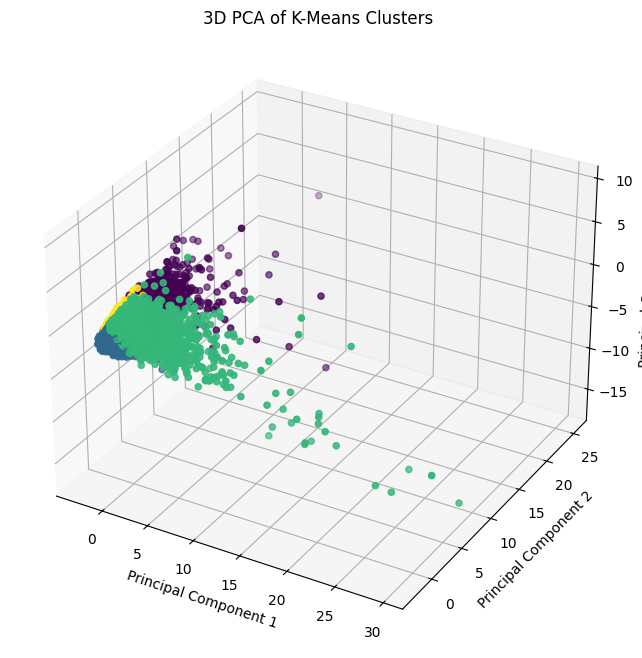

In [34]:
# Let's have a visual representaion of our clusters , How they look?
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA


pca = PCA(n_components=3)
principal_components = pca.fit_transform(scaled_data)


pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2', 'PC3'])

pca_df['Cluster'] = df['Cluster']


fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(pca_df['PC1'], pca_df['PC2'], pca_df['PC3'], c=pca_df['Cluster'], cmap='viridis', marker='o')
ax.set_title('3D PCA of K-Means Clusters')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')

plt.show()


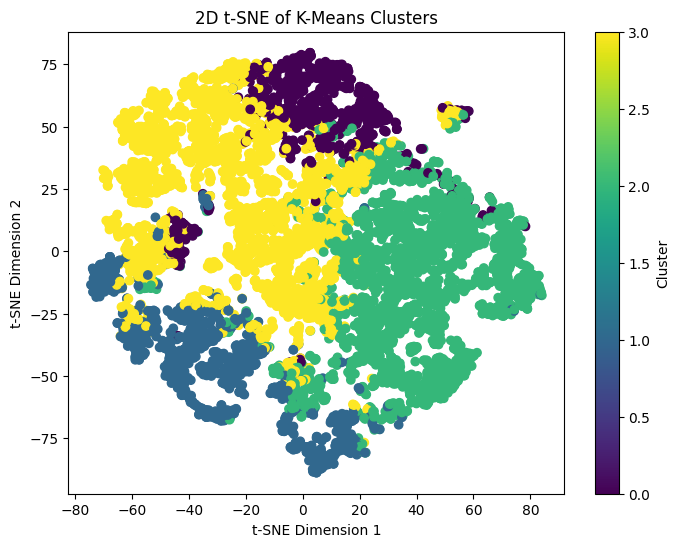

In [35]:
# Apply t-SNE to reduce the data to 2 dimensions for visualization or for better linear separation beccause in the above representation we can't se clusters clearly
from sklearn.manifold import TSNE


tsne = TSNE(n_components=2, random_state=42)
tsne_components = tsne.fit_transform(scaled_data)


tsne_df = pd.DataFrame(data=tsne_components, columns=['tSNE1', 'tSNE2'])


tsne_df['Cluster'] = df['Cluster']


plt.figure(figsize=(8,6))
plt.scatter(tsne_df['tSNE1'], tsne_df['tSNE2'], c=tsne_df['Cluster'], cmap='viridis', marker='o')
plt.title('2D t-SNE of K-Means Clusters')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.colorbar(label='Cluster')
plt.show()


In [36]:
# Above both of them are 2D plots so we can't get a proper visual of our cluster's so now let's use plolty for 3D representaion of our clusters

import plotly.express as px
from sklearn.decomposition import PCA


pca = PCA(n_components=3)
principal_components = pca.fit_transform(scaled_data)


pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2', 'PC3'])


pca_df['Cluster'] = df['Cluster']


fig = px.scatter_3d(pca_df, x='PC1', y='PC2', z='PC3', color='Cluster', title='3D PCA of K-Means Clusters',
                    labels={'PC1': 'Principal Component 1', 'PC2': 'Principal Component 2', 'PC3': 'Principal Component 3'},
                    color_continuous_scale='viridis')


fig.show()
